Imports iniciais necessários

In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Sampling Methods
from imblearn.over_sampling import SMOTE

In [144]:
df_train = pd.read_csv('treino.csv')
df_test = pd.read_csv('teste.csv')

Primeiramente, foi utilizada a função head(), tanto no dataframe de treino e teste de maneira que possa possilitar uma visão geral da estrutura dos dados.

In [145]:
df_train.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [146]:
df_test.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


Visualizar todas as colunas do dataset

In [147]:
df_train.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

# 0 - Pré processando e analisando os dados

### Análise Estatistica

O metódo .info() imprime as informações sobre um DataFrame, incluindo o dtype, as colunas do índice, valores não nulos e uso de memória.

In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   inadimplente                           110000 non-null  int64  
 1   util_linhas_inseguras                  110000 non-null  float64
 2   idade                                  110000 non-null  int64  
 3   vezes_passou_de_30_59_dias             110000 non-null  int64  
 4   razao_debito                           110000 non-null  float64
 5   salario_mensal                         88237 non-null   float64
 6   numero_linhas_crdto_aberto             110000 non-null  int64  
 7   numero_vezes_passou_90_dias            110000 non-null  int64  
 8   numero_emprestimos_imobiliarios        110000 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  110000 non-null  int64  
 10  numero_de_dependentes                  107122 non-null  

O método describe() exibe informações estatística da base de dados

 - count: a quantidade de linhas
 - mean: média dos valores por coluna
 - std: desvio padrão
 - min: valor mínimo
 - quartis (25%,50% e 75%)
 - max: valor máximo

In [149]:
df_train.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,8.823700e+04,110000.000000,110000.000000,110000.000000,110000.000000,107122.000000
mean,0.066645,5.929979,52.255636,0.424055,354.823589,6.637411e+03,8.445573,0.269955,1.019891,0.243891,0.757482
std,0.249408,252.301965,14.768241,4.240780,2074.140421,1.338395e+04,5.139026,4.217326,1.135989,4.204137,1.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030054,41.000000,0.000000,0.175016,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155936,52.000000,0.000000,0.366682,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562806,63.000000,0.000000,0.866874,8.225000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [150]:
#Porcentagem de numeros em branco
df_train.isnull().sum() / len(df_train)*100

inadimplente                              0.000000
util_linhas_inseguras                     0.000000
idade                                     0.000000
vezes_passou_de_30_59_dias                0.000000
razao_debito                              0.000000
salario_mensal                           19.784545
numero_linhas_crdto_aberto                0.000000
numero_vezes_passou_90_dias               0.000000
numero_emprestimos_imobiliarios           0.000000
numero_de_vezes_que_passou_60_89_dias     0.000000
numero_de_dependentes                     2.616364
dtype: float64

Há dados ausentes nas colunas de numero_de_dependentes e salario_mensal. Na primeira, menos de 3% estão ausentes, é possivel preencher esses dados com a média do parâmetro ou eliminar as linhas com dados ausentes. Como vemos um forte desbalanceamento da classe 1, é mais interessante que, inicialmente, não eliminemos amostras. Então, a primeira opção parece mais interessante. Já no segundo caso, quase 20% dos dados são faltantes, porém, como espera-se que o salário tenha correlação relativamente forte com a inadimplência, não podemos eliminar a coluna e nem as linhas com dados ausentes. Então, saída para o segundo caso também é preencher esses valores com a média de salarios mensais.

In [151]:
#Verificando se tem campos em branco base de teste
df_test.isnull().sum()

util_linhas_inseguras                       0
idade                                       0
vezes_passou_de_30_59_dias                  0
razao_debito                                0
salario_mensal                           7968
numero_linhas_crdto_aberto                  0
numero_vezes_passou_90_dias                 0
numero_emprestimos_imobiliarios             0
numero_de_vezes_que_passou_60_89_dias       0
numero_de_dependentes                    1046
dtype: int64

In [152]:
df_train[(df_train['salario_mensal'].isnull()) & (df_train['inadimplente'] == 1)]

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
179,1,0.946964,35,0,1593.0,NaN,6,0,1,0,1.0
214,1,0.655316,63,0,5223.0,NaN,19,0,2,0,0.0
354,1,0.953344,48,2,2073.0,NaN,5,1,2,2,0.0
398,1,0.802417,58,1,668.0,NaN,5,1,0,0,0.0
789,1,1.008507,58,3,3265.0,NaN,20,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
109616,1,1.000000,48,0,1761.0,NaN,7,0,0,0,0.0
109714,1,0.900119,43,1,1493.0,NaN,14,0,0,1,NaN
109716,1,0.578842,47,0,1460.0,NaN,2,0,1,0,0.0
109774,1,1.000000,62,0,53.0,NaN,0,0,0,0,0.0


In [153]:
total_inadimplente = df_train.inadimplente.value_counts() / len(df_train)
total_inadimplente

0    0.933355
1    0.066645
Name: inadimplente, dtype: float64

A base de treino está desbalanceada, vou criar um modelo sem desbalancear e depois um balanceando a base.

## Tratamento da base

### Tratamento do Dataset

- Conforme informado anteriormente, as colunas salario_mensal e numero_de_dependentes possuem valores nulos, foi utilizada a média para preenchimento dos valores nulos.

In [154]:
#Preenchi os valores nulos com a média
df_train['salario_mensal'].fillna(df_train['salario_mensal'].mean(), inplace=True)
df_train['numero_de_dependentes'].fillna(df_train['numero_de_dependentes'].mean(), inplace=True)
df_test['salario_mensal'].fillna(df_test['salario_mensal'].mean(), inplace=True)
df_test['numero_de_dependentes'].fillna(df_test['numero_de_dependentes'].mean(), inplace=True)

In [155]:
df_train.isnull().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [156]:
df_test.isnull().sum()

util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

Agora que temos todos os dados presentes, podemos continuar com a análise. Começamos analisando a correlação entre as variáveis, com foco na inadimplência.

<AxesSubplot:>

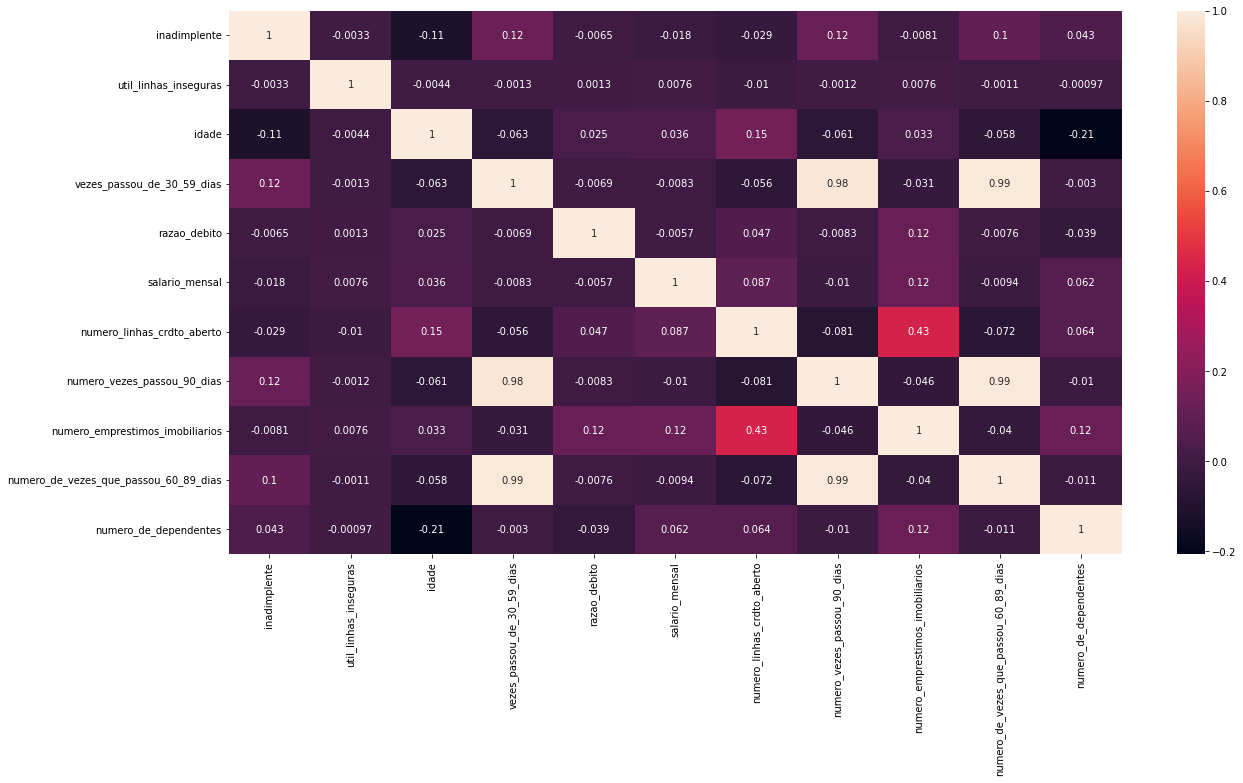

In [157]:
plt.figure(figsize=(20,10))
corr = df_train.corr()
corr = (corr)
sns.heatmap(corr, annot=True)

Algumas variaveis são interessantes, tais como:

- numero_vezes_passou_90_dias
- numreo_de_vezes_que_passou_60_89_dias
- idade
- util_linhas_inseguras

Aparentemente, nenhuma tem uma correlação muito forte

<AxesSubplot:xlabel='numero_linhas_crdto_aberto'>

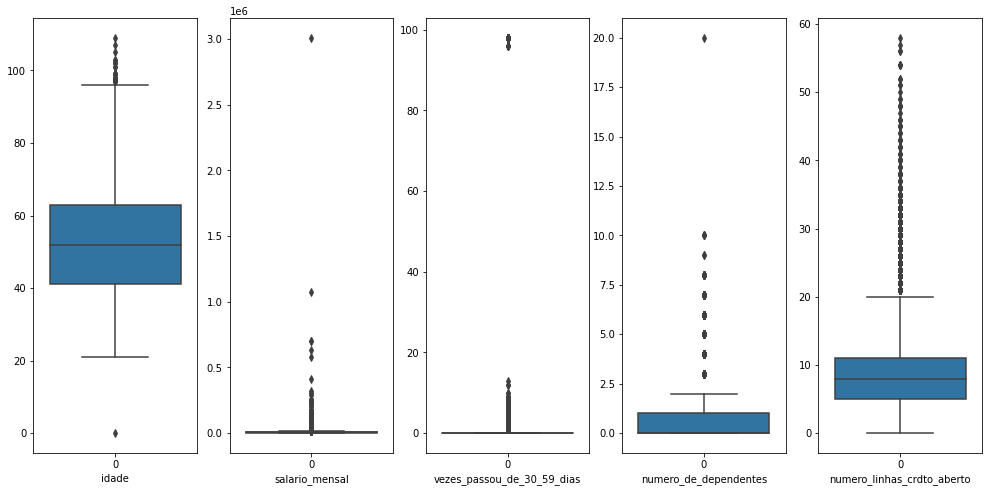

In [212]:
fig,ax = plt.subplots(1,5,figsize=(17,8))
ax[0].set_xlabel('idade')
sns.boxplot(ax=ax[0],data=df_train['idade'])
ax[1].set_xlabel('salario_mensal')
sns.boxplot(ax=ax[1],data=df_train['salario_mensal'])
ax[2].set_xlabel('vezes_passou_de_30_59_dias')
sns.boxplot(ax=ax[2],data=df_train['vezes_passou_de_30_59_dias'])
ax[3].set_xlabel('numero_de_dependentes')
sns.boxplot(ax=ax[3],data=df_train['numero_de_dependentes'])
ax[4].set_xlabel('numero_linhas_crdto_aberto')
sns.boxplot(ax=ax[4],data=df_train['numero_linhas_crdto_aberto'])

<AxesSubplot:xlabel='util_linhas_inseguras'>

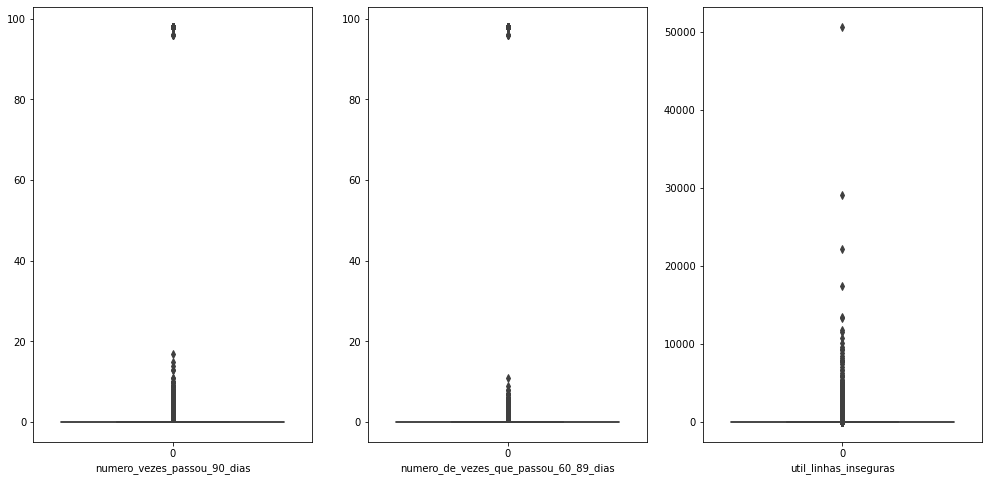

In [219]:
fig,ax = plt.subplots(1,3,figsize=(17,8))
ax[0].set_xlabel('numero_vezes_passou_90_dias')
sns.boxplot(ax=ax[0],data=df_train['numero_vezes_passou_90_dias'])
ax[1].set_xlabel('numero_de_vezes_que_passou_60_89_dias')
sns.boxplot(ax=ax[1],data=df_train['numero_de_vezes_que_passou_60_89_dias'])
ax[2].set_xlabel('util_linhas_inseguras')
sns.boxplot(ax=ax[2],data=df_train['util_linhas_inseguras'])

In [ ]:
#df_train.drop(df_train[df_train['idade']>90].index,inplace=True)
#df_train.drop(df_train[df_train['idade']<20].index,inplace=True)

#df_train.drop(df_train[df_train['salario_mensal']>25000].index,inplace=True)
#df_train.drop(df_train[df_train['salario_mensal']<0].index,inplace=True)

#df_train.drop(df_train[df_train['numero_linhas_crdto_aberto']>25].index,inplace=True)
#df_train.drop(df_train[df_train['numero_linhas_crdto_aberto']<0].index,inplace=True)

#df_train.drop(df_train[df_train['vezes_passou_de_30_59_dias']>20].index,inplace=True)
#df_train.drop(df_train[df_train['vezes_passou_de_30_59_dias']<0].index,inplace=True)

#df_train.drop(df_train[df_train['numero_de_dependentes']>12].index,inplace=True)

### Separando e tratando o conjunto de dados

In [161]:
target_name = 'inadimplente'
X = df_train.drop('inadimplente', axis=1)
y = df_train[target_name]

In [162]:
X.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [163]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: inadimplente, dtype: int64

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\RP150643\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['indices', 'logistic']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1 - Aplicando modelos com o dataset desbalanceado

## Função da baseline

np.zeros -> retorna um array preenchido com zeros

In [165]:
def baseline_model(X):
  y = np.zeros(X.shape[0])
  return y

In [166]:
#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
   X, 
   y, 
   random_state=0, 
   test_size=0.50,
   stratify=y
   )

In [167]:
#Analise do baseline
p_val = baseline_model(X_val)

In [168]:
np.mean(y_val == p_val)

0.9333636363636364

## Arvore de decisão

In [169]:
#Treinando o modelo com arvore de decisão
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree = dtree.fit(X_train, y_train)

O max_depth acerta mais 1 do que o min_samples_leaf

Fiz testes aleatórios e verifiquei que o max_depth = 5 possui a melhor acurácia, foi o indicativo utilizado para continuar com o parametro == 5

**Resultado testeando o Maxdepth**

None -> 0.8974181818181818

1 -> 0.9334545454545454

5 -> 0.9354727272727272

10 -> 0.932509090909091


**Resultado testeando o min_samples_leaf**

None -> 0.8978727272727273

1 -> 0.8978727272727273

5 -> 0.919290909090909

10 -> 0.9280363636363637

In [170]:
p_val = dtree.predict(X_val)

**Fazendo avaliação do modelo**

In [171]:
#Verificando a acuracia
accuracy_score(p_val, y_val)

0.9346545454545454

In [172]:
#Verificando a curva ROC
roc_auc_score(y_val, p_val)

0.5969726714193516

O modelo não está bom, só está praticamente acertando o que é 0, ou seja, que não é inadimplente.

In [173]:
print(classification_report(y_val, p_val))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     51335
           1       0.52      0.21      0.30      3665

    accuracy                           0.93     55000
   macro avg       0.74      0.60      0.63     55000
weighted avg       0.92      0.93      0.92     55000



Com base na ROC o modelo basicamente só acerta os casos que são 0, quando faz a media entre a classe 0 e 1 a curva ROC mostra uma % de quase 50%, está quase um processo aleatório.

In [174]:
print(pd.crosstab(y_val, p_val, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0     1    All
Real                       
0        50646   689  51335
1         2905   760   3665
All      53551  1449  55000


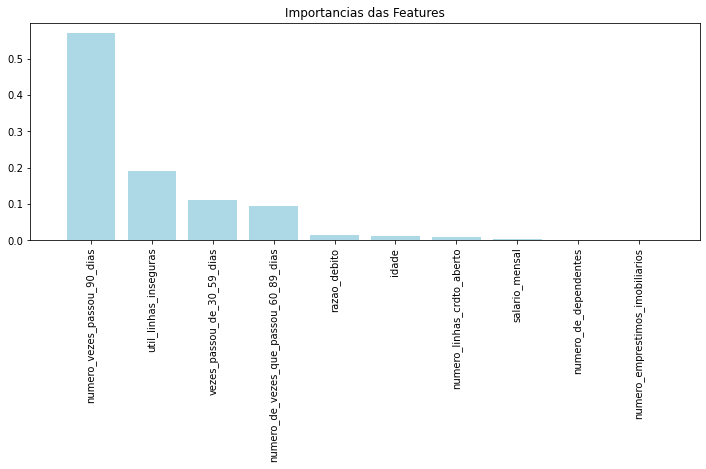

In [175]:
#Verificar quais as principais variaveis para o modelo
importances = dtree.feature_importances_
feat_names = df_train.drop(['inadimplente'], axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Importancias das Features")
plt.bar(range(len(indices)), importances[indices],color='lightblue')
plt.xticks(range(len(indices)), feat_names[indices], rotation = 'vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [176]:
#Filtrandro apenas os atributos relevantes
X = df_train[["numero_vezes_passou_90_dias", "vezes_passou_de_30_59_dias","numero_de_vezes_que_passou_60_89_dias","util_linhas_inseguras"]]

## Logistic Regression

In [177]:
from sklearn.linear_model import LogisticRegression

In [220]:
#Instanciando o algoritmo
logistic = LogisticRegression(max_iter=100)

In [221]:
#Realizando o treinamento
logistic.fit(X_train,y_train)

LogisticRegression()

In [180]:
#Calculando as predições
p_val = logistic.predict(X_val)

In [181]:
#Avaliando o modelo
np.mean(y_val == p_val)

0.9334363636363636

In [182]:
#Resultado ponderado das classes 0 e 1
roc_auc_score(y_val, p_val)

0.5061198735906813

In [183]:
print(classification_report(y_val, p_val))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97     51335
           1       0.52      0.01      0.03      3665

    accuracy                           0.93     55000
   macro avg       0.73      0.51      0.50     55000
weighted avg       0.91      0.93      0.90     55000



In [184]:
print(pd.crosstab(y_val, p_val, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0   1    All
Real                     
0        51291  44  51335
1         3617  48   3665
All      54908  92  55000


## Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [186]:
#Realizando o treinamento
rf = rf.fit(X_train, y_train)

In [187]:
p_val = rf.predict(X_val)

In [188]:
#Avaliando o modelo
print(np.mean(y_val == p_val))
print(roc_auc_score(y_val, p_val))
print(classification_report(y_val, p_val))
print(pd.crosstab(y_val, p_val, rownames=['Real'],colnames=['Predito'],margins=True))

0.9353090909090909
0.5837679390027068
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     51335
           1       0.54      0.18      0.27      3665

    accuracy                           0.94     55000
   macro avg       0.74      0.58      0.62     55000
weighted avg       0.92      0.94      0.92     55000

Predito      0     1    All
Real                       
0        50789   546  51335
1         3012   653   3665
All      53801  1199  55000


A area sobre a curva do randomforest foi a melhor até o momento

Todos os modelos treinados com a base desbalanceada não tiveram um resultado bom

# 2 - Aplicando o modelo com o dataset balanceado

## Aplicando o SMOTE

- Gerar dados sintéticos da classe minoritária

In [189]:
# Separa os dados e as classes
target_name = 'inadimplente'
X = df_train.drop('inadimplente', axis=1)
y = df_train[target_name]

In [190]:
#Vou utilizar o min_max_scaler para deixar todas as features na mesma escala, as escalas do salarios são diferente de outras features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [191]:
# Instância o SMOTE
smt = SMOTE()

In [192]:
#Aplica o SMOTE nos dados
X, y = smt.fit_resample(X,y)

<AxesSubplot:xlabel='inadimplente', ylabel='count'>

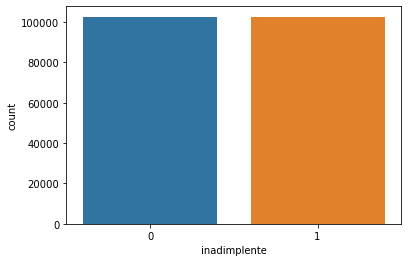

In [193]:
#Visualizando a distribuição
sns.countplot(x=y)

In [194]:
#Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
   X, 
   y, 
   random_state=0, 
   test_size=0.50,
   stratify=y
   )

## Random Forest

random_state = uma random_forest quando está criando o modelo tem várias pontos que vai ser utilizada a aleatoriedade e por conta disso é utilizado o random_state para fixar a aleatoriedade, permitindo que os resultados sejam reprodutiveis

n_jobs = demonstra a quantidade de arvores em paralelo que o modelo irá criar...o -1 informa que serão utilizados todos os threads disponíveis no computador para criação das arvores

In [195]:
#Treinar o modelo
#Escolhi o random forest pois tinha sido o melhor modelo antes de aplicar o SMOTE
rf = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=300)

In [196]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)

In [197]:
p_val = rf.predict(X_val)

In [198]:
#Avaliando o modelo
print(np.mean(y_val == p_val))
print(roc_auc_score(y_val, p_val))
print(classification_report(y_val, p_val))
print(pd.crosstab(y_val, p_val, rownames=['Real'],colnames=['Predito'],margins=True))

0.945621365748181
0.9456212115819574
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     51335
           1       0.96      0.93      0.94     51334

    accuracy                           0.95    102669
   macro avg       0.95      0.95      0.95    102669
weighted avg       0.95      0.95      0.95    102669

Predito      0      1     All
Real                         
0        49356   1979   51335
1         3604  47730   51334
All      52960  49709  102669


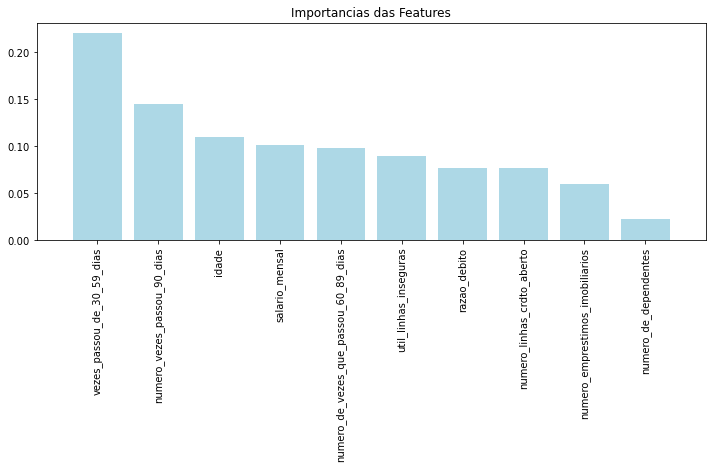

In [199]:
#Verificar quais as principais variaveis para o modelo
importances = rf.feature_importances_
feat_names = df_train.drop(['inadimplente'], axis=1).columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Importancias das Features")
plt.bar(range(len(indices)), importances[indices],color='lightblue')
plt.xticks(range(len(indices)), feat_names[indices], rotation = 'vertical')
plt.xlim([-1, len(indices)])
plt.show()

O modelo conseguiu bater a baseline. Portanto esse será o escolhido para fazer predição.

# 3 - Predição do modelo

In [200]:
X_test = df_test

In [201]:
X_train.shape, y_train.shape, X_test.shape

((102669, 10), (102669,), (40000, 10))

In [202]:
p = dtree.predict(X_test)

In [203]:
X_test['inadimplente'] = p

In [204]:
X_test[X_test['inadimplente']==1]

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
18,0.815551,49,1,4081.000000,6760.601836,5,3,2,1,0.756508,1
24,1.000000,41,0,1365.000000,6760.601836,2,5,1,0,0.000000,1
32,0.001496,43,4,0.492458,5833.000000,8,1,1,3,0.000000,1
92,0.599408,63,8,0.427368,7000.000000,13,6,2,3,0.000000,1
136,1.000000,39,98,0.000000,6760.601836,0,98,0,98,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
39838,1.000000,56,0,0.421492,3833.000000,2,7,0,1,0.000000,1
39848,0.971924,40,5,0.920374,5236.000000,10,4,4,0,2.000000,1
39885,1.009769,39,2,0.520378,4661.000000,11,0,0,0,0.000000,1
39887,1.000000,28,98,8.000000,6760.601836,0,98,0,98,0.000000,1


In [205]:
X_test.to_csv('resultado_predic_rafael_santos.csv')